<a href="https://colab.research.google.com/github/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/blob/main/K_Means_Clustering_Wholesale_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Load & Explore Dataset

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
#load data
Wholesale_df=pd.read_csv("https://raw.githubusercontent.com/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/main/Data/Wholesale%20customers%20data.csv")
Wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Description of the dataset
Wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# info of the dataset
Wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#shape
Wholesale_df.shape

(440, 8)

# 2) Preprocessing Data

## Clean Data

In [6]:
# Check Missing Values
Wholesale_df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:
# Check Duplicate Values
Wholesale_df.duplicated().sum()

0

In [8]:
# Drop the first two columns as these are unnecessary
Wholesale_df = Wholesale_df.iloc[:, 2:]
Wholesale_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Outliers

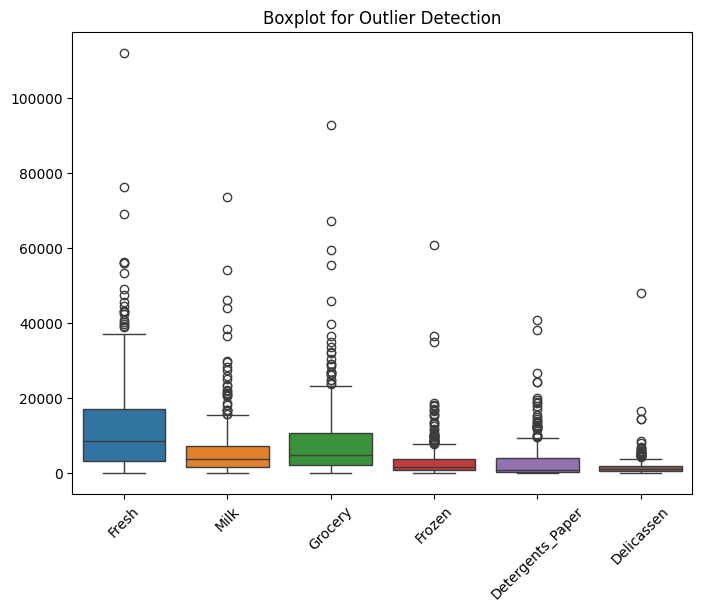

In [9]:
# Detect and Handle Outliers using Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Wholesale_df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [12]:
# Calculate z-scores for each value
z = np.abs((Wholesale_df - Wholesale_df.mean()) / Wholesale_df.std())

# Filter out values with z-score > 3
Wholesale_df_filtered = Wholesale_df[(z < 3).all(axis=1)]

# Print the shape of the original and filtered dataset
print("Original shape:", Wholesale_df.shape)
print("Filtered shape:", Wholesale_df_filtered.shape)

Original shape: (440, 6)
Filtered shape: (414, 6)


## Normalized Data

In [ ]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Wholesale_df_filtered)
df_scaled[:5]

array([[ 0.28760532, -0.871061  ,  0.26529024,  0.22065409],
       [ 0.66269103, -0.24660139,  0.50949913,  0.67310027],
       [-0.33660309,  1.62597063, -0.58963812,  0.68549606],
       [-0.16746878, -0.68872525, -0.08149427,  0.33738107],
       [ 0.17808851, -0.76375721,  0.44913732, -0.59850076]])

# 3) Exploratory Data Analysis (EDA)

## Heatmap

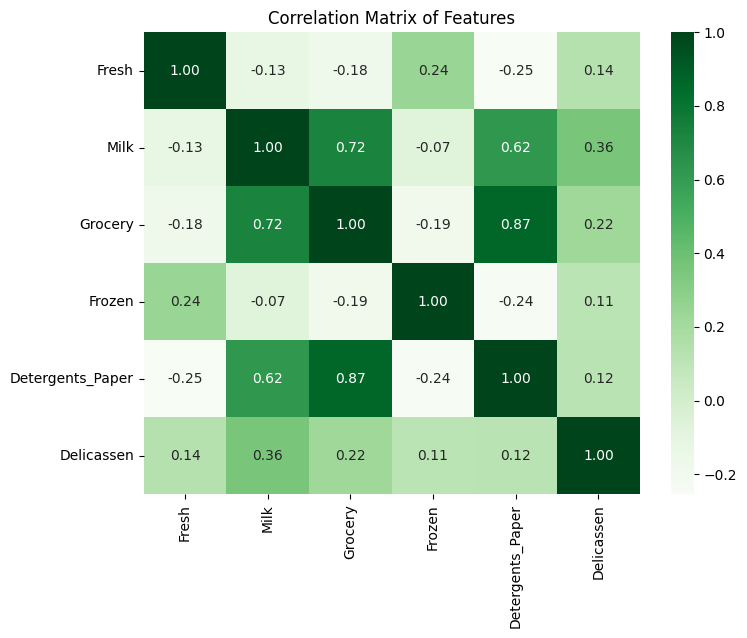

In [21]:
# correlation matrix
correlation_matrix = Wholesale_df_filtered.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Histogram

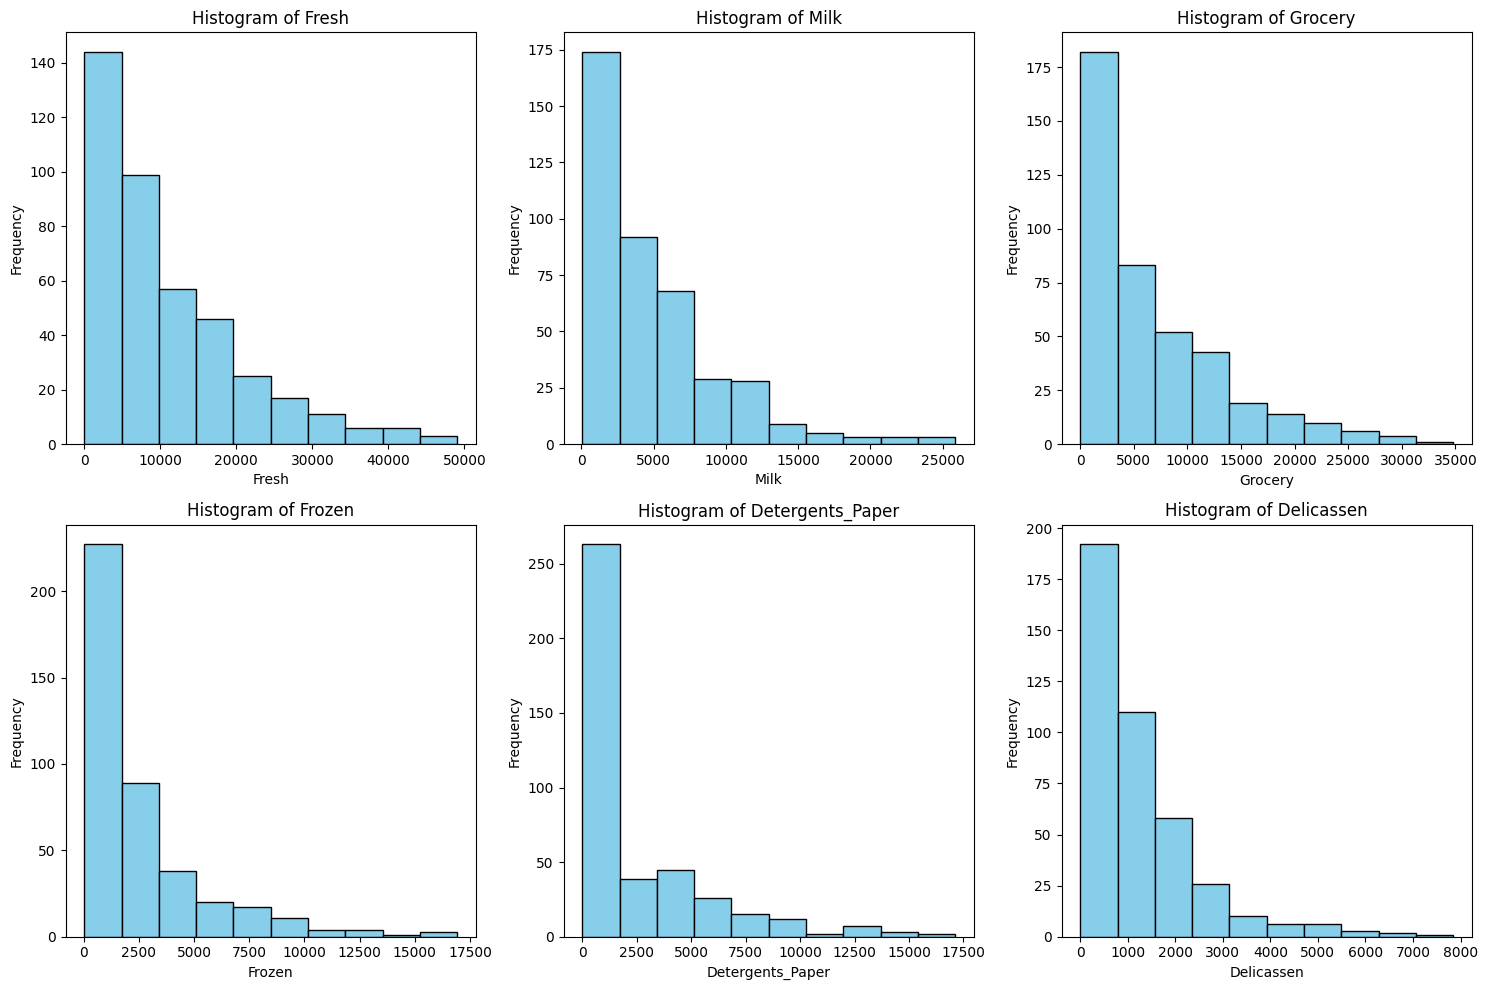

In [25]:
# Create a histogram for each feature or column
plt.figure(figsize=(15, 10))
for i, col in enumerate(Wholesale_df_filtered.columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    plt.hist(Wholesale_df_filtered[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
